In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [ ]:
df_r1 = pd.read_csv('WithoutInterimManager.csv')
             
df_r1.shape

(12000, 24)

In [ ]:
df_r1.head() 

,Employee Code,Employee_Name,Interim Manager,Band,Department,Designation,Process,Education Field,Gender,Age,Salary,Rating,Happiness index,Distance from current Address,Attrition Status,Date Of Joining,Date of Attrition,LWD,Exit interview comments - HR,Unnamed: 19,Over18,Stock Option Level,Direct Report,Marital Status
0,507854.0,LJBTYYQM EBQNHPFG,Timothy Mingo,A2,MT,Analyst,Finance,Commerce,Male,23.0,Good,C,3.0,3.0,No,14/02/2007,NaN,NaN,NaN,NaN,Y,NaN,NaN,0.0
1,296273.0,KLBMBMFY KQUUUEJN,Roy Chapman,A3,MT,Analyst,Underpayments,Medical,Male,45.0,Good,B,1.0,2.0,Yes,14/02/2007,31/08/2007 0:00,31/08/2007,NaN,NaN,Y,NaN,the managers from my experience did not know h...,1.0
2,130299.0,ZJKQOSHS AQEBHMAF,Ryan Shook,A2,PFS 2,BPQA,Underpayments,Arts,Male,37.0,Good,B,3.0,4.0,No,5/3/2007,NaN,NaN,NaN,NaN,Y,NaN,NaN,1.0
3,348192.0,RBYOTBBX YEILAUJM,Rita Owens,A2,PFS 1,Senior Analyst,Underpayments,Technical,Female,28.0,Fair,C,1.0,1.0,Yes,5/3/2007,12/2/2008 0:00,22/02/2008,Afroz has to take care of family issue.,NaN,Y,NaN,NaN,1.0
4,737651.0,XYRANZYP DPWOXGFF,William Mccarthy,A3,FCC,Analyst,Quality,Commerce,Female,30.0,Good,A,2.0,3.0,Yes,5/3/2007,9/9/2007 0:00,7/9/2007,NaN,NaN,Y,NaN,NaN,1.0


In [ ]:
df_r1.dtypes

Employee Code                    float64
Employee_Name                     object
Interim Manager                   object
Band                              object
Department                        object
Designation                       object
Process                           object
Education Field                   object
Gender                            object
Age                              float64
Salary                            object
Rating                            object
Happiness index                  float64
Distance from current Address    float64
Attrition Status                  object
Date Of Joining                   object
Date of Attrition                 object
LWD                               object
Exit interview comments - HR      object
Unnamed: 19                      float64
Over18                            object
Stock Option Level               float64
Direct Report                     object
Marital Status                   float64
dtype: object

In [ ]:
df_r1.isnull().sum()

Employee Code                      400
Employee_Name                      400
Interim Manager                    400
Band                               400
Department                         400
Designation                        400
Process                            400
Education Field                    400
Gender                             400
Age                                400
Salary                             400
Rating                             400
Happiness index                    400
Distance from current Address      400
Attrition Status                   400
Date Of Joining                    400
Date of Attrition                 7950
LWD                               7906
Exit interview comments - HR     10625
Unnamed: 19                      12000
Over18                             400
Stock Option Level               12000
Direct Report                    11880
Marital Status                     400
dtype: int64

In [ ]:
df_r1.drop('Employee Code', axis=1, inplace=True)
df_r1.drop('Employee_Name', axis=1, inplace=True)
df_r1.drop('Over18', axis=1, inplace=True)
df_r1.drop('Unnamed: 19', axis=1, inplace=True)
df_r1.drop('Stock Option Level', axis=1, inplace=True)
df_r1.drop('Direct Report', axis=1, inplace=True)
df_r1.drop('Date Of Joining', axis=1, inplace=True)
df_r1.drop('Date of Attrition', axis=1, inplace=True)
df_r1.drop('LWD', axis=1, inplace=True)
df_r1.drop('Exit interview comments - HR', axis=1, inplace=True)
df_r1.drop('Process', axis=1, inplace=True)

In [ ]:
df_r1=df_r1.dropna()
df_r1.isnull().sum()

Interim Manager                  0
Band                             0
Department                       0
Designation                      0
Education Field                  0
Gender                           0
Age                              0
Salary                           0
Rating                           0
Happiness index                  0
Distance from current Address    0
Attrition Status                 0
Marital Status                   0
dtype: int64

In [ ]:
df_r1.shape

(11600, 13)

In [ ]:
df_r1['Attrition Status'] = df_r1['Attrition Status'].map({'No':0, 'Yes':1})

In [ ]:
df_r1.describe()

,Age,Happiness index,Distance from current Address,Attrition Status,Marital Status
count,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000
mean,28.997931,3.007414,3.554828,0.356897,0.570690
std,6.104981,1.286703,1.541202,0.479105,0.494999
min,21.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,2.000000,2.000000,0.000000,0.000000
50%,28.000000,3.000000,4.000000,0.000000,1.000000
75%,33.000000,4.000000,4.000000,1.000000,1.000000
max,45.000000,5.000000,8.000000,1.000000,1.000000


In [ ]:
df_r1.head()

,Interim Manager,Band,Department,Designation,Education Field,Gender,Age,Salary,Rating,Happiness index,Distance from current Address,Attrition Status,Marital Status
0,Timothy Mingo,A2,MT,Analyst,Commerce,Male,23.0,Good,C,3.0,3.0,0,0.0
1,Roy Chapman,A3,MT,Analyst,Medical,Male,45.0,Good,B,1.0,2.0,1,1.0
2,Ryan Shook,A2,PFS 2,BPQA,Arts,Male,37.0,Good,B,3.0,4.0,0,1.0
3,Rita Owens,A2,PFS 1,Senior Analyst,Technical,Female,28.0,Fair,C,1.0,1.0,1,1.0
4,William Mccarthy,A3,FCC,Analyst,Commerce,Female,30.0,Good,A,2.0,3.0,1,1.0


In [ ]:
df_dummy = pd.get_dummies(df_r1)
df_dummy.head()

,Age,Happiness index,Distance from current Address,Attrition Status,Marital Status,Interim Manager_Adam Leyva,Interim Manager_Aileen Palmiter,Interim Manager_Ann Hoffman,Interim Manager_Barbara Medel,Interim Manager_Barbara Towell,Interim Manager_Betty Utterback,Interim Manager_Christine Mcmaster,Interim Manager_David Vargas,Interim Manager_Dennis Davis,Interim Manager_Doug Maddox,Interim Manager_Eva Stefanski,Interim Manager_Frank Kanish,Interim Manager_Gayla Wojciechowski,Interim Manager_Gene Lantz,Interim Manager_George Quintanilla,Interim Manager_Gerard Bellinger,Interim Manager_Han Nichols,Interim Manager_James Langford,Interim Manager_Jane Jones,Interim Manager_Jean Schafer,Interim Manager_Jeff Thurman,Interim Manager_Joanne Nelson,Interim Manager_Joaquin Powell,Interim Manager_Joe Moore,Interim Manager_John Kinsey,Interim Manager_Julius Wright,Interim Manager_Karen Slye,Interim Manager_Kerri Sanders,Interim Manager_Linda Bishop,Interim Manager_Margarita Aldredge,Interim Manager_Mary Miller,Interim Manager_Mirella Swett,Interim Manager_Ralph Woolcott,Interim Manager_Rita Owens,Interim Manager_Roy Chapman,...,Interim Manager_Tonia Weaver,Interim Manager_Will Friedman,Interim Manager_William Mccarthy,Interim Manager_William Nelson,Band_A1,Band_A2,Band_A3,Department_FCC,Department_IT,Department_MT,Department_Operations,Department_PFS 1,Department_PFS 2,Department_SD,Department_Support,Designation_Analyst,Designation_BPQA,Designation_Business Analyst,Designation_Coding Analyst,Designation_Consultant,Designation_Engineer,Designation_Executive,Designation_MT/QA,Designation_SD Agent,Designation_Senior Analyst,Designation_Support,Education Field_Arts,Education Field_Commerce,Education Field_Medical,Education Field_Others,Education Field_Technical,Gender_Female,Gender_Male,Salary_Fair,Salary_Good,Rating_A,Rating_B,Rating_C,Rating_C\n,Rating_D
0,23.0,3.0,3.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
1,45.0,1.0,2.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
2,37.0,3.0,4.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
3,28.0,1.0,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0
4,30.0,2.0,3.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [ ]:
df_r1_model = df_dummy

y = df_r1_model['Attrition Status']
X = df_r1_model.drop('Attrition Status', axis=1, inplace=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaled = X.copy()

col_names = ['Age', 'Happiness index', 'Distance from current Address', 'Marital Status']

features = X_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_scaled[col_names] = features
X_scaled.head()

,Age,Happiness index,Distance from current Address,Marital Status,Interim Manager_Adam Leyva,Interim Manager_Aileen Palmiter,Interim Manager_Ann Hoffman,Interim Manager_Barbara Medel,Interim Manager_Barbara Towell,Interim Manager_Betty Utterback,Interim Manager_Christine Mcmaster,Interim Manager_David Vargas,Interim Manager_Dennis Davis,Interim Manager_Doug Maddox,Interim Manager_Eva Stefanski,Interim Manager_Frank Kanish,Interim Manager_Gayla Wojciechowski,Interim Manager_Gene Lantz,Interim Manager_George Quintanilla,Interim Manager_Gerard Bellinger,Interim Manager_Han Nichols,Interim Manager_James Langford,Interim Manager_Jane Jones,Interim Manager_Jean Schafer,Interim Manager_Jeff Thurman,Interim Manager_Joanne Nelson,Interim Manager_Joaquin Powell,Interim Manager_Joe Moore,Interim Manager_John Kinsey,Interim Manager_Julius Wright,Interim Manager_Karen Slye,Interim Manager_Kerri Sanders,Interim Manager_Linda Bishop,Interim Manager_Margarita Aldredge,Interim Manager_Mary Miller,Interim Manager_Mirella Swett,Interim Manager_Ralph Woolcott,Interim Manager_Rita Owens,Interim Manager_Roy Chapman,Interim Manager_Roy Woolf,...,Interim Manager_Tonia Weaver,Interim Manager_Will Friedman,Interim Manager_William Mccarthy,Interim Manager_William Nelson,Band_A1,Band_A2,Band_A3,Department_FCC,Department_IT,Department_MT,Department_Operations,Department_PFS 1,Department_PFS 2,Department_SD,Department_Support,Designation_Analyst,Designation_BPQA,Designation_Business Analyst,Designation_Coding Analyst,Designation_Consultant,Designation_Engineer,Designation_Executive,Designation_MT/QA,Designation_SD Agent,Designation_Senior Analyst,Designation_Support,Education Field_Arts,Education Field_Commerce,Education Field_Medical,Education Field_Others,Education Field_Technical,Gender_Female,Gender_Male,Salary_Fair,Salary_Good,Rating_A,Rating_B,Rating_C,Rating_C\n,Rating_D
0,-0.982507,-0.005762,-0.360012,-1.152960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
1,2.621263,-1.560189,-1.008885,0.867333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
2,1.310801,-0.005762,0.288860,0.867333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
3,-0.163469,-1.560189,-1.657757,0.867333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0
4,0.164147,-0.782976,-0.360012,0.867333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [ ]:
import time
start = time.time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
end = time.time()
xgb_time = end-start
print('Train Time (seconds) of XGBOOST without PCA:',xgb_time)

Train Time (seconds) of XGBOOST without PCA: 1.6240479946136475


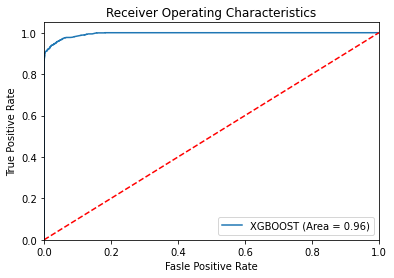


Confusion Matrix
[[2202   55]
 [  74 1149]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2257
           1       0.95      0.94      0.95      1223

    accuracy                           0.96      3480
   macro avg       0.96      0.96      0.96      3480
weighted avg       0.96      0.96      0.96      3480



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_xgb = xgb.predict(X_test)

xgb_roc_auc = roc_auc_score(y_test,y_pred_xgb)
fpr, tpr, thresholds = roc_curve(y_test,xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBOOST (Area = %0.2f)' % xgb_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_xgb = confusion_matrix(y_test,y_pred_xgb)
print("\nConfusion Matrix")
print(confusion_matrix_xgb)

classify_xgb = classification_report(y_test, y_pred_xgb)
print("\nClassification Report")
print(classify_xgb)

In [ ]:
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.29%


In [ ]:
from sklearn.decomposition import PCA


n = 90
pca = PCA(n/100)


pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

To retain 90 % of the variation, we needed 30 components


In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
start = time.time()

xgb_pca = XGBClassifier()
xgb_pca.fit(X_train_pca, y_train)

end = time.time()
xgb_time_pca = end-start
print('Train Time (seconds) of XGBOOST with PCA:',xgb_time_pca)

Train Time (seconds) of XGBOOST with PCA: 1.6203322410583496


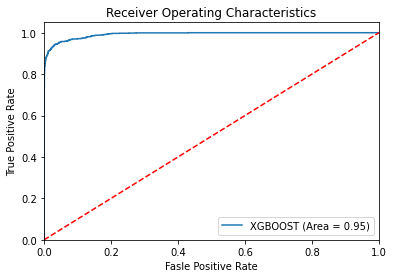


Confusion Matrix
[[2192   65]
 [  78 1145]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2257
           1       0.95      0.94      0.94      1223

    accuracy                           0.96      3480
   macro avg       0.96      0.95      0.95      3480
weighted avg       0.96      0.96      0.96      3480



In [ ]:
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)

xgb_roc_auc_pca = roc_auc_score(y_test,y_pred_xgb_pca)
fpr, tpr, thresholds = roc_curve(y_test,xgb_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBOOST (Area = %0.2f)' % xgb_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_xgb_pca = confusion_matrix(y_test,y_pred_xgb_pca)
print("\nConfusion Matrix")
print(confusion_matrix_xgb_pca)

classify_xgb_pca = classification_report(y_test, y_pred_xgb_pca)
print("\nClassification Report")
print(classify_xgb_pca)

In [ ]:
accuracy = {'Model': ['XGBOOST'], 
               'Accuracy - no PCA (%)': [97], 
               'Accuracy - PCA (%)': [96]
              }


acc = pd.DataFrame(data=accuracy)

acc

,Model,Accuracy - no PCA (%),Accuracy - PCA (%)
0,XGBOOST,97,96


TypeError: ignored

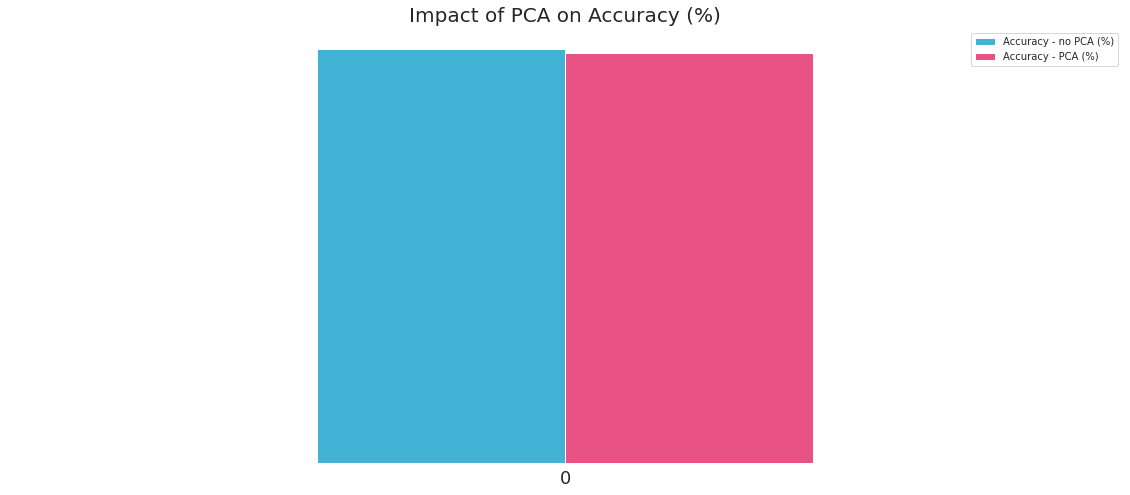

In [ ]:
sns.set_style(style='white')
ax = acc.plot(kind='bar', figsize=(20,8), width=0.4, color=['#42b3d5', '#e85285'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Accuracy (%)', fontsize=20)

for n in range(2):
    for index, val in enumerate(acc.iloc[:,n].transpose()): 
        label=str(val) + '%'
        
        if n==0:
            ax.annotate(label, xy=(index-0.15, val-5), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val-5), color='#ffffff', fontsize=14, fontweight='bold')

plt.show()

In [ ]:
time = {'Model': ['XGBOOST'],
                  'Train Time - no PCA (s) ': [xgb_time],
                  'Train Time - PCA (s) ': [xgb_time_pca]
               }


tm = pd.DataFrame(data=time)
tm

,Model,Train Time - no PCA (s),Train Time - PCA (s)
0,XGBOOST,1.624048,1.620332


In [ ]:
tm = tm.set_index('Model')

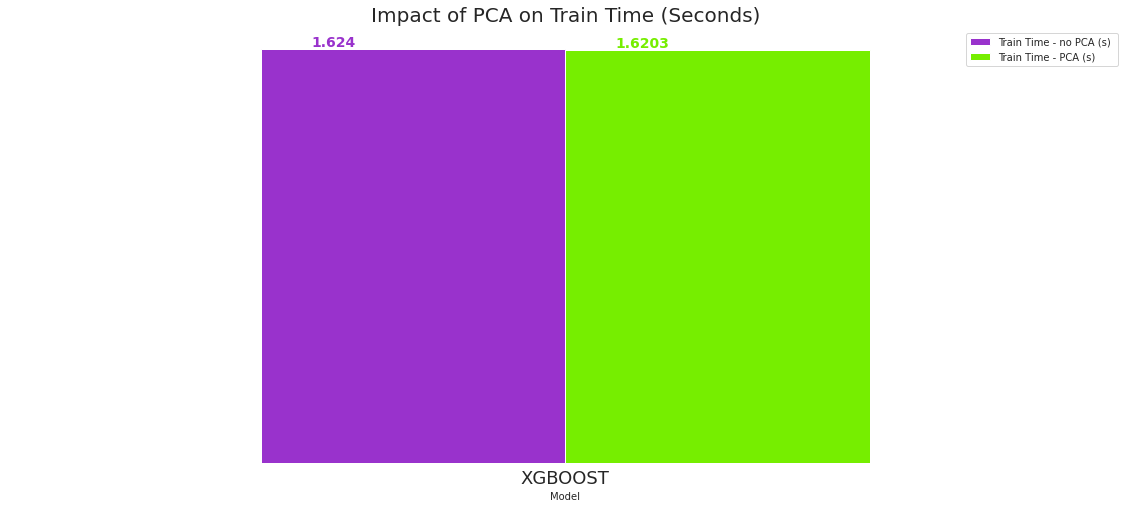

In [ ]:
sns.set_style(style='white')

ax = tm.plot(kind='bar', figsize=(20,8), width=0.6, color=['#9932CC', '#76EE00'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Train Time (Seconds)', fontsize=20)


for n in range(2):
    for index, val in enumerate(tm.iloc[:,n].transpose()): 
        label=str(round(val,4))
        
        if n==0:
            ax.annotate(label, xy=(index-0.25, val+0.007), color='#9932CC', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val+0.007), color='#76EE00', fontsize=14, fontweight='bold')